In [ ]:
#https://www.kaggle.com/code/anandhuh/breast-cancer-prediction-accuracy-98-24/input
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture as GMM
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification


data = pd.read_csv('/content/BCdata.csv')

In [ ]:
print(data.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [ ]:
# Create a synthetic dataset for demonstration
df, _ = make_classification(n_samples=300, n_features=10, n_informative=5, n_redundant=0, random_state=42)
df = pd.DataFrame(df, columns=[f'feature_{i+1}' for i in range(10)])

# Display the first few rows of the dataset
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10
0,-2.458887,0.737524,0.585394,-0.710081,0.213904,0.032576,-0.597710,2.457384,-1.526271,1.798587
1,0.571922,-1.530790,1.416630,0.699014,-1.553584,-1.707384,0.635446,-1.764502,-1.117418,-1.341071
2,0.859360,0.437094,1.691492,-0.165528,-1.199860,-0.349615,-0.679385,-2.640871,-0.377044,-3.715749
3,-1.345839,1.610736,0.827821,-0.731513,1.217374,-0.749031,-1.023196,1.892467,-1.029935,1.077439
4,-2.306743,0.261068,2.221781,-0.153826,-0.796171,-0.486580,-0.872930,1.883011,-0.019749,3.538238


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
# PREPROCESS
# Normalize the dataset using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Convert back to DataFrame for easy handling
X_scaled_df = pd.DataFrame(X_scaled, columns=df.columns)

In [ ]:
#GMM Clustering
# Set the number of clusters
n_clusters = 2

# Fit the GMM model
gmm = GMM(n_components=n_clusters, covariance_type='full', random_state=42)
gmm.fit(X_scaled)

# Get the cluster labels
labels = gmm.predict(X_scaled)

# Add cluster labels to the original DataFrame
df['Cluster'] = labels

# Display the updated DataFrame with cluster labels
df.head()

GaussianMixture(n_components=2, random_state=42)

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,Cluster
0,-2.458887,0.737524,0.585394,-0.710081,0.213904,0.032576,-0.597710,2.457384,-1.526271,1.798587,1
1,0.571922,-1.530790,1.416630,0.699014,-1.553584,-1.707384,0.635446,-1.764502,-1.117418,-1.341071,0
2,0.859360,0.437094,1.691492,-0.165528,-1.199860,-0.349615,-0.679385,-2.640871,-0.377044,-3.715749,0
3,-1.345839,1.610736,0.827821,-0.731513,1.217374,-0.749031,-1.023196,1.892467,-1.029935,1.077439,1
4,-2.306743,0.261068,2.221781,-0.153826,-0.796171,-0.486580,-0.872930,1.883011,-0.019749,3.538238,1


<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='feature_1', ylabel='feature_2'>

Text(0.5, 1.0, 'GMM Clustering Results')

Text(0.5, 0, 'Feature 1')

Text(0, 0.5, 'Feature 2')

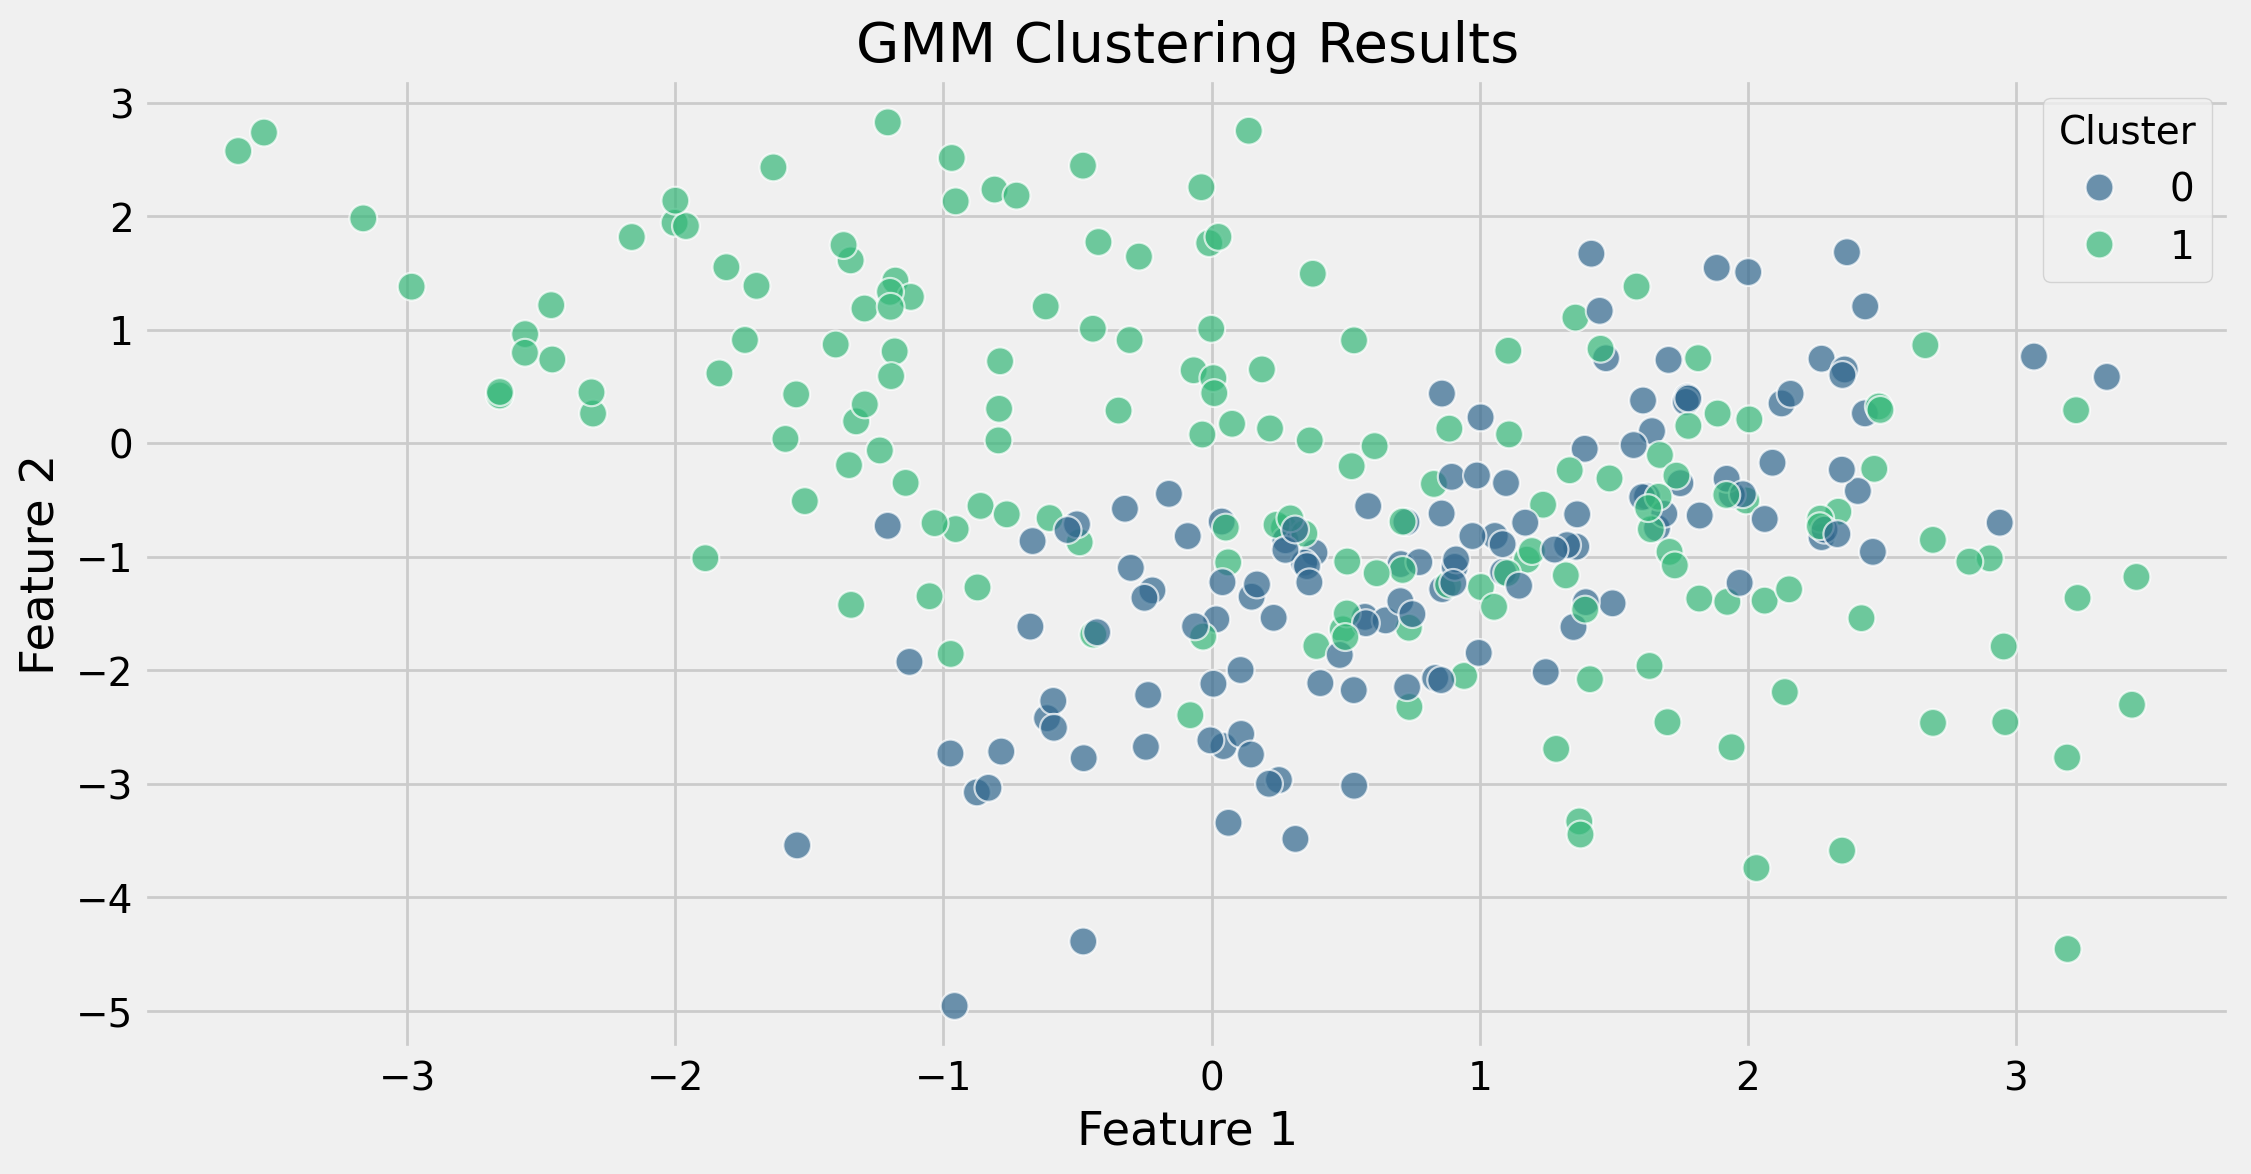

In [ ]:
# Visualize the results of the clustering
plt.figure(figsize=(12, 6))

# Scatter plot of the first two features colored by cluster labels
sns.scatterplot(data=df, x='feature_1', y='feature_2', hue='Cluster', palette='viridis', s=100, alpha=0.7)
plt.title('GMM Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Cluster')
plt.show()

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10
0,-2.458887,0.737524,0.585394,-0.710081,0.213904,0.032576,-0.597710,2.457384,-1.526271,1.798587
1,0.571922,-1.530790,1.416630,0.699014,-1.553584,-1.707384,0.635446,-1.764502,-1.117418,-1.341071
2,0.859360,0.437094,1.691492,-0.165528,-1.199860,-0.349615,-0.679385,-2.640871,-0.377044,-3.715749
3,-1.345839,1.610736,0.827821,-0.731513,1.217374,-0.749031,-1.023196,1.892467,-1.029935,1.077439
4,-2.306743,0.261068,2.221781,-0.153826,-0.796171,-0.486580,-0.872930,1.883011,-0.019749,3.538238


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

GaussianMixture(n_components=2, random_state=42)

Converged: True
Number of iterations to converge: 26


,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,Cluster
0,-2.458887,0.737524,0.585394,-0.710081,0.213904,0.032576,-0.597710,2.457384,-1.526271,1.798587,1
1,0.571922,-1.530790,1.416630,0.699014,-1.553584,-1.707384,0.635446,-1.764502,-1.117418,-1.341071,0
2,0.859360,0.437094,1.691492,-0.165528,-1.199860,-0.349615,-0.679385,-2.640871,-0.377044,-3.715749,0
3,-1.345839,1.610736,0.827821,-0.731513,1.217374,-0.749031,-1.023196,1.892467,-1.029935,1.077439,1
4,-2.306743,0.261068,2.221781,-0.153826,-0.796171,-0.486580,-0.872930,1.883011,-0.019749,3.538238,1


<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='feature_1', ylabel='feature_2'>

Text(0.5, 1.0, 'GMM Clustering Results')

Text(0.5, 0, 'Feature 1')

Text(0, 0.5, 'Feature 2')

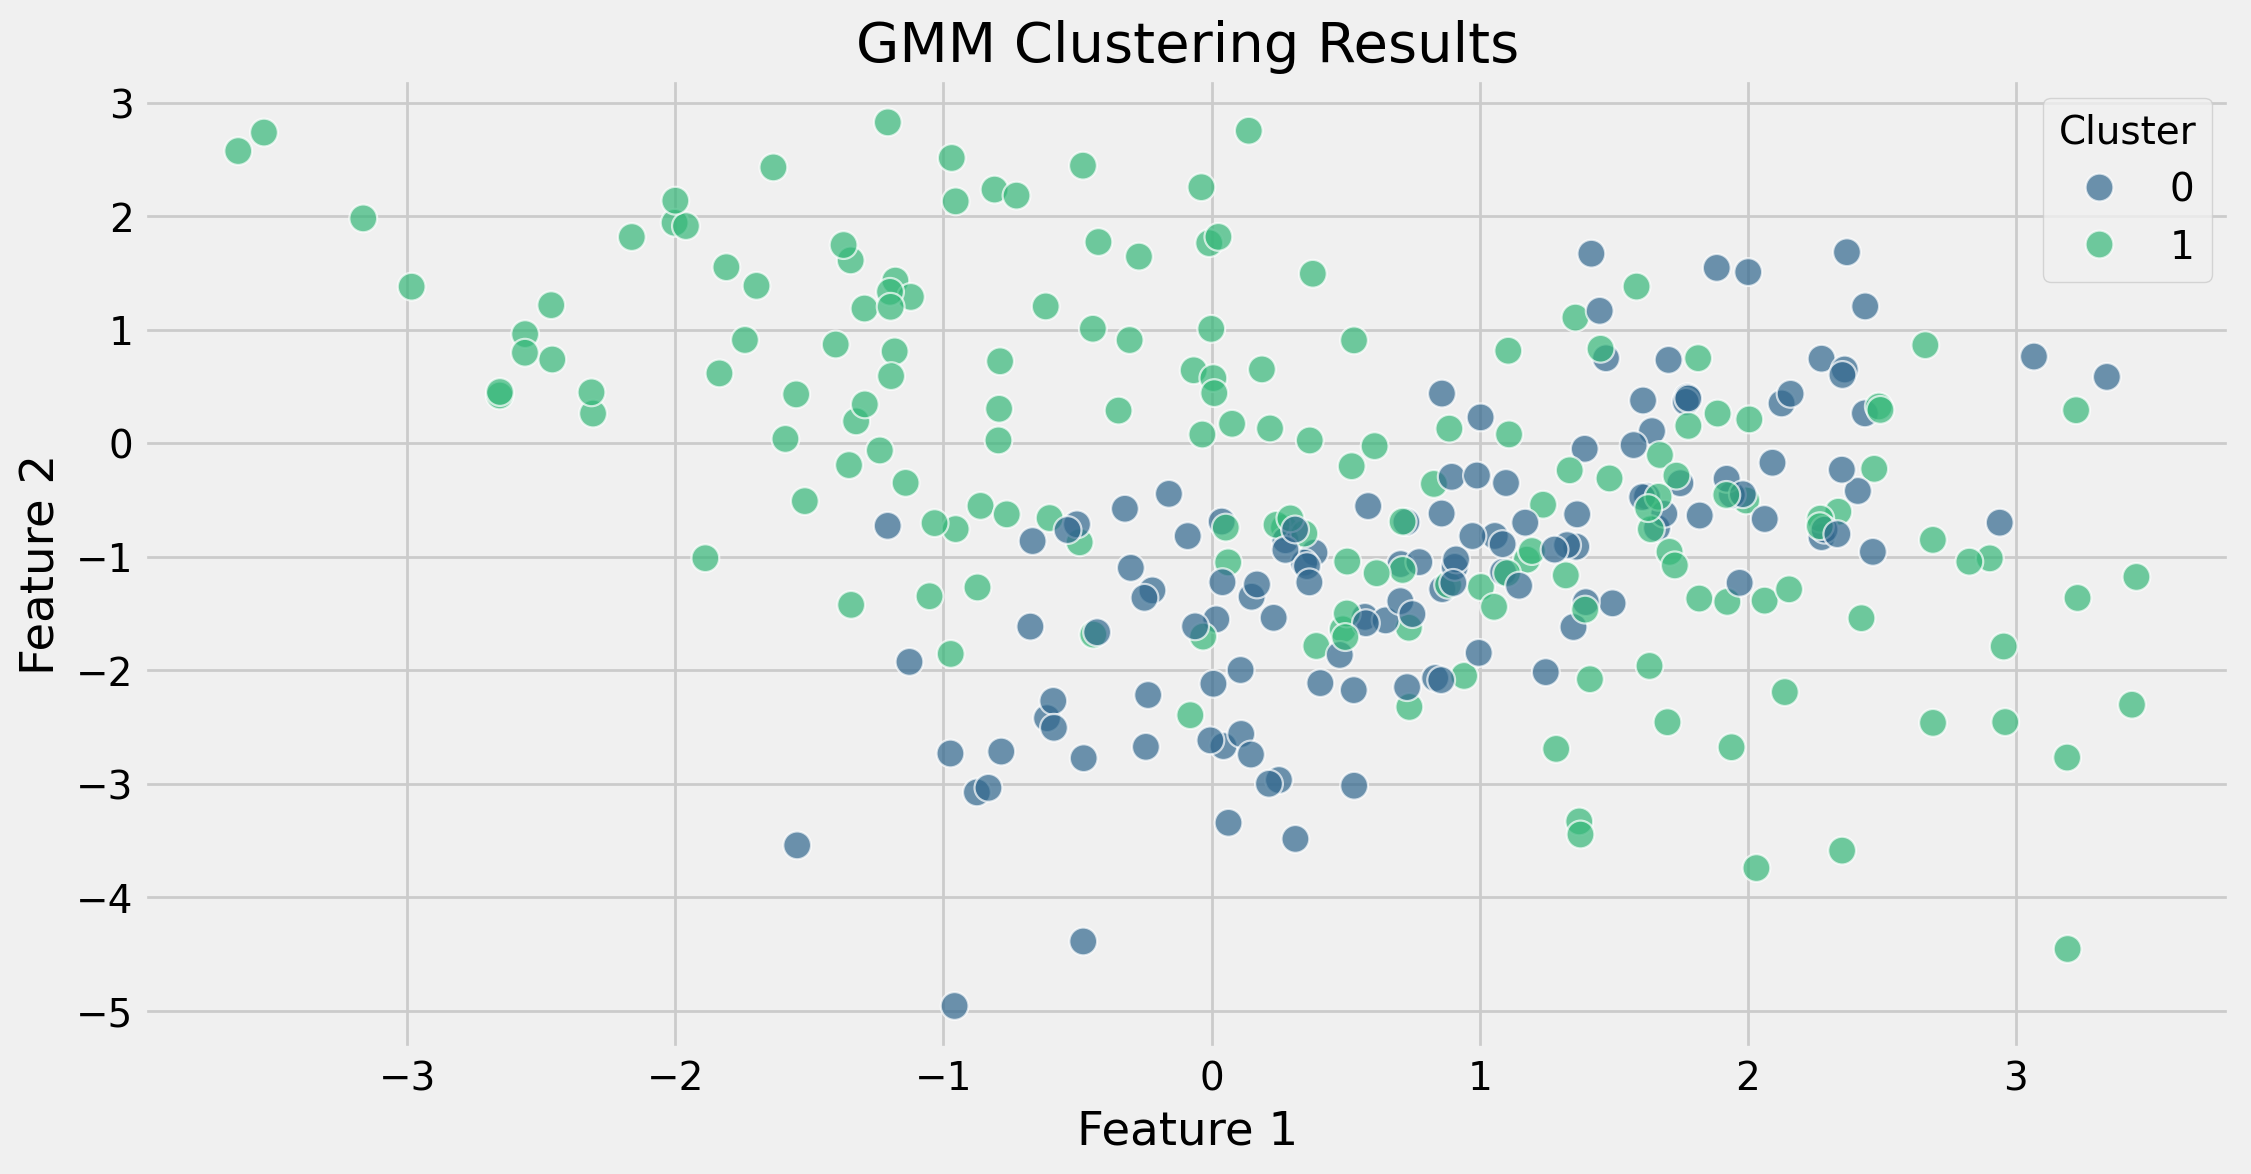

In [ ]:
#convergence

from sklearn.mixture import GaussianMixture as GMM
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
#https://www.kaggle.com/code/anandhuh/breast-cancer-prediction-accuracy-98-24/input
# Import necessary libraries


data = pd.read_csv('/content/BCdata.csv')
print(data.columns)
# Create a synthetic dataset for demonstration
df, _ = make_classification(n_samples=300, n_features=10, n_informative=5, n_redundant=0, random_state=42)
df = pd.DataFrame(df, columns=[f'feature_{i+1}' for i in range(10)])

# Display the first few rows of the dataset
df.head()
data.info()
# PREPROCESS
# Normalize the dataset using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Convert back to DataFrame for easy handling
X_scaled_df = pd.DataFrame(X_scaled, columns=df.columns)
#GMM Clustering
# Set the number of clusters
n_clusters = 2

# Fit the GMM model
gmm = GMM(n_components=n_clusters, covariance_type='full', random_state=42)
gmm.fit(X_scaled)

# Check for convergence
print("Converged:", gmm.converged_)
print("Number of iterations to converge:", gmm.n_iter_)

# Get the cluster labels
labels = gmm.predict(X_scaled)

# Add cluster labels to the original DataFrame
df['Cluster'] = labels

# Display the updated DataFrame with cluster labels
df.head()
# Visualize the results of the clustering
plt.figure(figsize=(12, 6))

# Scatter plot of the first two features colored by cluster labels
sns.scatterplot(data=df, x='feature_1', y='feature_2', hue='Cluster', palette='viridis', s=100, alpha=0.7)
plt.title('GMM Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Cluster')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('BCdata.csv')

# Drop the 'Unnamed: 32' column and 'id' column
df = df.drop(['Unnamed: 32', 'id'], axis=1)

# Convert diagnosis to binary
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Select features and scale them
features = df.drop('diagnosis', axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Implement GMM with a binomial distribution conceptually
class BinomialGMM:
    def __init__(self, n_components, max_iter=100):
        self.n_components = n_components
        self.max_iter = max_iter

    def fit(self, X):
        n_samples, n_features = X.shape
        self.weights_ = np.ones(self.n_components) / self.n_components
        self.means_ = np.random.rand(self.n_components, n_features)
        self.probs_ = np.random.rand(self.n_components, n_features)

        for _ in range(self.max_iter):
            # E-step: Calculate responsibilities
            resp = np.zeros((n_samples, self.n_components))
            for k in range(self.n_components):
                prob = np.prod(np.power(self.probs_[k], X) * np.power(1 - self.probs_[k], 1 - X), axis=1)
                resp[:, k] = self.weights_[k] * prob

            resp /= resp.sum(axis=1, keepdims=True)

            # M-step: Update weights, means, and probabilities
            Nk = resp.sum(axis=0)
            self.weights_ = Nk / n_samples
            self.means_ = (resp.T @ X) / Nk[:, None]
            self.probs_ = (resp.T @ X) / Nk[:, None]

    def predict(self, X):
        n_samples = X.shape[0]
        resp = np.zeros((n_samples, self.n_components))
        for k in range(self.n_components):
            prob = np.prod(np.power(self.probs_[k], X) * np.power(1 - self.probs_[k], 1 - X), axis=1)
            resp[:, k] = self.weights_[k] * prob

        return resp.argmax(axis=1)

# Initialize and fit the model
binomial_gmm = BinomialGMM(n_components=2)
binomial_gmm.fit(X_scaled)

# Predict cluster labels
labels = binomial_gmm.predict(X_scaled)

# Add cluster labels to the DataFrame
df['Cluster'] = labels

# Display the first few rows of the updated DataFrame
print(df.head())

   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  \
0         0.2419                 0.